In [31]:
import ROOT as R

In [44]:
files={}
# files['PMT']=R.TFile("LYSO_Optimisation.root")
files['MS3_DRY']=R.TFile('data/MS3.root')
files['OPT_DRY']=R.TFile('LYSO_ARRAY_DRY_Optimisation.root')
files['OPT2_DRY']=R.TFile('data/OPT2/prodAnalysis_c40_OptStep1_Jan2022.root')

In [94]:
g={}
# for tag in ['MS3','OPT']:
#     for t in ['lyAbs','lyNorm','tau','lyDT']:
#         g['%s_%s_PMT'%(t,tag)]=files['PMT'].Get('%s_%s'%(t,tag))
g['LY_MS3_DRY']=files['MS3_DRY'].Get('ly_array')
g['LY_OPT_DRY']=files['OPT_DRY'].Get('LY_OPT_DRY')
g['LY_OPT2_DRY']=files['OPT2_DRY'].Get('ly_byProd_PREIRR')

g['LY_OPT_DRY'].Print()
g['LY_OPT2_DRY'].Print()

x[0]=0.1, y[0]=2586.22, ex[0]=0, ey[0]=77.5866
x[1]=1.1, y[1]=2757.33, ex[1]=0, ey[1]=82.7198
x[2]=2.1, y[2]=2488.67, ex[2]=0, ey[2]=74.6601
x[3]=3.1, y[3]=2695.03, ex[3]=0, ey[3]=80.8508
x[4]=4.1, y[4]=2697.97, ex[4]=0, ey[4]=80.939
x[5]=5.1, y[5]=2867.02, ex[5]=0, ey[5]=86.0105
x[0]=0.05, y[0]=75.1409, ex[0]=0, ey[0]=9.23377
x[1]=1.05, y[1]=0, ex[1]=0, ey[1]=0
x[2]=2.05, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.05, y[3]=0, ex[3]=0, ey[3]=0
x[4]=4.05, y[4]=72.7343, ex[4]=0, ey[4]=6.86714
x[5]=5.05, y[5]=0, ex[5]=0, ey[5]=0
x[6]=6.05, y[6]=0, ex[6]=0, ey[6]=0
x[7]=7.05, y[7]=0, ex[7]=0, ey[7]=0
x[8]=8.05, y[8]=83.7046, ex[8]=0, ey[8]=7.55401


In [46]:
arrays={}
arrays['MS3']={
    416:{'file':'data/tree_FirstRun006084_LastRun006087_ARRAY000416_OVSCAN_SUMMARY.root','prod':1},
    586:{'file':'data/tree_FirstRun006096_LastRun006099_ARRAY000586_OVSCAN_SUMMARY.root','prod':3},
    708:{'file':'data/tree_FirstRun006108_LastRun006111_ARRAY000708_OVSCAN_SUMMARY.root','prod':4},
    531:{'file':'data/tree_FirstRun006120_LastRun006123_ARRAY000531_OVSCAN_SUMMARY.root','prod':5},
    606:{'file':'data/tree_FirstRun006134_LastRun006137_ARRAY000606_OVSCAN_SUMMARY.root','prod':9},
    481:{'file':'data/tree_FirstRun006152_LastRun006155_ARRAY000481_OVSCAN_SUMMARY.root','prod':10},
}

arrays['OPT']={
    809:{'file':'data/tree_FirstRun006090_LastRun006093_ARRAY000809_OVSCAN_SUMMARY.root','prod':1},
    805:{'file':'data/tree_FirstRun006102_LastRun006105_ARRAY000805_OVSCAN_SUMMARY.root','prod':3},
    799:{'file':'data/tree_FirstRun006114_LastRun006117_ARRAY000799_OVSCAN_SUMMARY.root','prod':4},
    800:{'file':'data/tree_FirstRun006126_LastRun006129_ARRAY000800_OVSCAN_SUMMARY.root','prod':5},
    803:{'file':'data/tree_FirstRun006146_LastRun006149_ARRAY000803_OVSCAN_SUMMARY.root','prod':9},
    796:{'file':'data/tree_FirstRun006158_LastRun006161_ARRAY000796_OVSCAN_SUMMARY.root','prod':10}
}

arrays['OPT2']={
    810:{'file':'data/tree_FirstRun007056_LastRun007059_ARRAY000810_OVSCAN_SUMMARY.root','prod':1},
    821:{'file':'data/tree_FirstRun007062_LastRun007065_ARRAY000821_OVSCAN_SUMMARY.root','prod':5},
    830:{'file':'data/tree_FirstRun007068_LastRun007071_ARRAY000830_OVSCAN_SUMMARY.root','prod':10}
}

map_prod={
    1:0,
    3:1,
    4:2,
    5:3,
    9:4,
    10:5
}

In [47]:
for tag in ['MS3','OPT','OPT2']:
    for t in ['LY','LYDT','sigmaT','sigmaT_4V','sigmaTvsLYDT','sigmaT4VvsLYDT','XT']:
        g['%s_%s'%(t,tag)]=R.TGraphErrors(len(map_prod))
        
for tag in ['MS3','OPT','OPT2']:
    for ia,ar in enumerate(arrays[tag]):
        files[ar]=R.TFile(arrays[tag][ar]['file'])
        g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
        g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
        g['XT_%d'%ar]=files[ar].Get('XT_vs_bar')
        iv=map_prod[arrays[tag][ar]['prod']]
#         if (arrays[tag][ar]['prod']==9 and tag=='OPT'):
#             tau=g['tau_MS3_PMT'].GetY()[iv]
#         else:
#             tau=g['tau_%s_PMT'%tag].GetY()[iv]
#         print(ar,tau,arrays[tag][ar]['prod'])
        pos=iv
        if (tag=='OPT'):
            pos+=0.1
        elif(tag=='OPT2'):
            pos+=0.2
        g['LY_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8) #use 4V measure
        g['LY_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8)
#         g['LYDT_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau) #use 4V measure
#         g['LYDT_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau)
        g['sigmaT_%s'%tag].SetPoint(iv,pos,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
        g['sigmaT_%s'%tag].SetPointError(iv,0,g['sigmaT_%d'%ar].GetEY()[0]) #use 8V measure
        g['sigmaT_4V_%s'%tag].SetPoint(iv,pos,g['sigmaT_%d'%ar].GetY()[1]) #use 4V measure
        g['sigmaT_4V_%s'%tag].SetPointError(iv,0,g['sigmaT_%d'%ar].GetEY()[1]) #use 4V measure
#         g['sigmaTvsLYDT_%s'%tag].SetPoint(iv,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
#         g['sigmaTvsLYDT_%s'%tag].SetPointError(iv,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetEY()[0])
#         g['sigmaT4VvsLYDT_%s'%tag].SetPoint(iv,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetY()[1]) #use 4V measure
#         g['sigmaT4VvsLYDT_%s'%tag].SetPointError(iv,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetEY()[1])
        g['XT_%s'%tag].SetPoint(iv,pos,g['XT_%d'%ar].GetY()[0]) #use 8V measure
        g['XT_%s'%tag].SetPointError(iv,0,g['XT_%d'%ar].GetEY()[0])

In [48]:
# for tag in ['OPT2']:
#     for ia,ar in enumerate(arrays[tag]):
#         files[ar]=R.TFile(arrays[tag][ar]['file'])
#         g['sigmaT_%d'%ar]=files[ar].Get('sigmaT_vs_bar')
#         g['LY_%d'%ar]=files[ar].Get('LY_vs_bar')
#         g['XT_%d'%ar]=files[ar].Get('XT_vs_bar')
#         iv=map_prod[arrays[tag][ar]['prod']]
#         pos=iv
#         if (tag=='OPT2'):
#             pos+=0.2
#         g['LY_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8) #use 4V measure
#         g['LY_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8)
# #         g['LYDT_%s'%tag].SetPoint(iv,pos,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau) #use 4V measure
# #         g['LYDT_%s'%tag].SetPointError(iv,0,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau)
#         g['sigmaT_%s'%tag].SetPoint(iv,pos,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
#         g['sigmaT_%s'%tag].SetPointError(iv,0,g['sigmaT_%d'%ar].GetEY()[0]) #use 8V measure
#         g['sigmaT_4V_%s'%tag].SetPoint(iv,pos,g['sigmaT_%d'%ar].GetY()[1]) #use 4V measure
#         g['sigmaT_4V_%s'%tag].SetPointError(iv,0,g['sigmaT_%d'%ar].GetEY()[1]) #use 4V measure
# #         g['sigmaTvsLYDT_%s'%tag].SetPoint(iv,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetY()[0]) #use 8V measure
# #         g['sigmaTvsLYDT_%s'%tag].SetPointError(iv,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetEY()[0])
# #         g['sigmaT4VvsLYDT_%s'%tag].SetPoint(iv,g['LY_%d'%ar].GetY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetY()[1]) #use 4V measure
# #         g['sigmaT4VvsLYDT_%s'%tag].SetPointError(iv,g['LY_%d'%ar].GetEY()[1]*3950/48.8/tau,g['sigmaT_%d'%ar].GetEY()[1])
#         g['XT_%s'%tag].SetPoint(iv,pos,g['XT_%d'%ar].GetY()[0]) #use 8V measure
#         g['XT_%s'%tag].SetPointError(iv,0,g['XT_%d'%ar].GetEY()[0])

In [49]:
g['relGain_LY_OPT']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_opt=g['LY_OPT'].GetY()[iv]
    ly_arr_ms3=g['LY_MS3'].GetY()[iv]
    ly_arr_opt2=g['LY_OPT2'].GetY()[iv]
#     if (v!=9):
#         ly_pmt_opt=g['lyNorm_OPT_PMT'].GetY()[iv]
#     else:
#         ly_pmt_opt=g['lyNorm_MS3_PMT'].GetY()[iv]
#     ly_pmt_ms3=g['lyNorm_MS3_PMT'].GetY()[iv]
#     if (ly_arr_ms3>0 and ly_arr_opt>0):
#         print(v,ly_arr_opt,ly_pmt_opt,ly_arr_ms3,ly_pmt_ms3)
#         g['relGain_LY_OPT'].SetPoint(iv,iv,(ly_arr_opt/ly_pmt_opt)/(ly_arr_ms3/ly_pmt_ms3))
#         g['relGain_LY_OPT'].SetPointError(iv,0,0.07)
# g['relGain_LY_OPT'].Print()

In [92]:
map_prod_ms3_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}
g['LY_MS3'].Print()
g['LY_MS3_DRY'].Print()
g['rel_MS3_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_ms3=g['LY_MS3'].GetY()[iv]/g['LY_MS3'].GetY()[0]
    ly_arr_dry_ms3=g['LY_MS3_DRY'].GetY()[map_prod_ms3_dry[v]]/g['LY_MS3_DRY'].GetY()[0]
    if (ly_arr_grease_ms3>0 and ly_arr_dry_ms3>0):
        g['rel_MS3_DRY_GREASE'].SetPoint(iv,ly_arr_grease_ms3,ly_arr_dry_ms3)
        g['rel_MS3_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_MS3_DRY_GREASE'].Print()

g['LY_DRY_GREASE_MS3']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_ms3=g['LY_MS3'].GetY()[iv]/g['LY_MS3_DRY'].GetY()[map_prod_ms3_dry[v]]/2600.
    if (ly_arr_grease_ms3>0):
        g['LY_DRY_GREASE_MS3'].SetPoint(iv,iv,ly_arr_grease_ms3)
        g['LY_DRY_GREASE_MS3'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_MS3'].Print()

x[0]=0, y[0]=3949.34, ex[0]=0, ey[0]=104.712
x[1]=1, y[1]=3825.94, ex[1]=0, ey[1]=137.756
x[2]=2, y[2]=3744.46, ex[2]=0, ey[2]=142.393
x[3]=3, y[3]=4615.7, ex[3]=0, ey[3]=77.2372
x[4]=4, y[4]=3924.52, ex[4]=0, ey[4]=157.001
x[5]=5, y[5]=4269.84, ex[5]=0, ey[5]=163.209
x[0]=0.26, y[0]=0.997918, ex[0]=0, ey[0]=0.0292477
x[1]=1.26, y[1]=1.1318, ex[1]=0, ey[1]=0.0375413
x[2]=2.26, y[2]=0.961765, ex[2]=0, ey[2]=0.0326065
x[3]=3.26, y[3]=0.979477, ex[3]=0, ey[3]=0.0338506
x[4]=4.26, y[4]=1.07134, ex[4]=0, ey[4]=0.0401968
x[5]=5.26, y[5]=0.903504, ex[5]=0, ey[5]=0.0794499
x[6]=6.26, y[6]=0.870008, ex[6]=0, ey[6]=0.0354183
x[7]=7.26, y[7]=1.02556, ex[7]=0, ey[7]=0.0325095
x[8]=8.26, y[8]=1.05497, ex[8]=0, ey[8]=0.0400633
x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0.968754, y[1]=0.963771, ex[1]=0.03, ey[1]=0.03
x[2]=0.948124, y[2]=0.98152, ex[2]=0.03, ey[2]=0.03
x[3]=1.16873, y[3]=1.07357, ex[3]=0.03, ey[3]=0.03
x[4]=0.993715, y[4]=1.0277, ex[4]=0.03, ey[4]=0.03
x[5]=1.08115, y[5]=1.05717, ex[

In [87]:
g['rel_OPT_DRY_GREASE']=R.TGraphErrors(6)

for v,iv in map_prod.items():
    ly_arr_grease=g['LY_OPT'].GetY()[iv]/g['LY_OPT'].GetY()[0]
    ly_arr_dry=g['LY_OPT_DRY'].GetY()[iv]/g['LY_OPT_DRY'].GetY()[0]
    if (ly_arr_grease>0 and ly_arr_dry>0):
        g['rel_OPT_DRY_GREASE'].SetPoint(iv,ly_arr_grease,ly_arr_dry)
        g['rel_OPT_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT_DRY_GREASE'].Print()


g['LY_DRY_GREASE_OPT']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease=g['LY_OPT'].GetY()[iv]/g['LY_OPT_DRY'].GetY()[iv]
    if (ly_arr_grease>0):
        g['LY_DRY_GREASE_OPT'].SetPoint(iv,iv,ly_arr_grease)
        g['LY_DRY_GREASE_OPT'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT'].Print()

x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=1.02024, y[1]=1.06616, ex[1]=0.03, ey[1]=0.03
x[2]=0.917177, y[2]=0.96228, ex[2]=0.03, ey[2]=0.03
x[3]=1.05731, y[3]=1.04207, ex[3]=0.03, ey[3]=0.03
x[4]=0.980939, y[4]=1.04321, ex[4]=0.03, ey[4]=0.03
x[5]=1.08976, y[5]=1.10857, ex[5]=0.03, ey[5]=0.03
x[0]=0, y[0]=1.67511, ex[0]=0.03, ey[0]=0.03
x[1]=1, y[1]=1.60296, ex[1]=0.03, ey[1]=0.03
x[2]=2, y[2]=1.59659, ex[2]=0.03, ey[2]=0.03
x[3]=3, y[3]=1.69961, ex[3]=0.03, ey[3]=0.03
x[4]=4, y[4]=1.57512, ex[4]=0.03, ey[4]=0.03
x[5]=5, y[5]=1.64667, ex[5]=0.03, ey[5]=0.03


In [93]:
map_prod_opt2_dry={
    1:0,
    2:1,
    3:2,
    4:3,
    5:4,
    6:5,
    8:6,
    9:7,
    10:8
}

g['LY_OPT2'].Print()
g['LY_OPT2_DRY'].Print()

g['rel_OPT2_DRY_GREASE']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_opt2=g['LY_OPT2'].GetY()[iv]/g['LY_OPT2'].GetY()[0]
    ly_arr_dry_opt2=g['LY_OPT2_DRY'].GetY()[map_prod_opt2_dry[v]]/g['LY_OPT2_DRY'].GetY()[0]
    if (ly_arr_grease_opt2>0 and ly_arr_dry_opt2>0):
        g['rel_OPT2_DRY_GREASE'].SetPoint(iv,ly_arr_grease_opt2,ly_arr_dry_opt2)
        g['rel_OPT2_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_OPT2_DRY_GREASE'].Print()

g['LY_DRY_GREASE_OPT2']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    if g['LY_OPT2_DRY'].GetY()[map_prod_opt2_dry[v]]>0:
        ly_arr_grease_opt2=g['LY_OPT2'].GetY()[iv]/g['LY_OPT2_DRY'].GetY()[map_prod_opt2_dry[v]]/2600.
    else:
        ly_arr_grease_opt2=0
    if (ly_arr_grease_opt2>0):
        g['LY_DRY_GREASE_OPT2'].SetPoint(iv,iv,ly_arr_grease_opt2)
        g['LY_DRY_GREASE_OPT2'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_OPT2'].Print()

x[0]=0.2, y[0]=4354.82, ex[0]=0, ey[0]=253.865
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.2, y[3]=4265.54, ex[3]=0, ey[3]=160.528
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5.2, y[5]=4740.44, ex[5]=0, ey[5]=161.569
x[0]=0.05, y[0]=75.1409, ex[0]=0, ey[0]=9.23377
x[1]=1.05, y[1]=0, ex[1]=0, ey[1]=0
x[2]=2.05, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.05, y[3]=0, ex[3]=0, ey[3]=0
x[4]=4.05, y[4]=72.7343, ex[4]=0, ey[4]=6.86714
x[5]=5.05, y[5]=0, ex[5]=0, ey[5]=0
x[6]=6.05, y[6]=0, ex[6]=0, ey[6]=0
x[7]=7.05, y[7]=0, ex[7]=0, ey[7]=0
x[8]=8.05, y[8]=83.7046, ex[8]=0, ey[8]=7.55401
x[0]=1, y[0]=1, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0.979498, y[3]=0.967973, ex[3]=0.03, ey[3]=0.03
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=1.08855, y[5]=1.11397, ex[5]=0.03, ey[5]=0.03
x[0]=0, y[0]=0.0222906, ex[0]=0.03, ey[0]=0.03
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3, y[3]=0.022556, ex[3]=0.03, ey[3]=0.03

In [76]:
_GREASE'].SetPoint(iv,ly_arr_grease_ms3,ly_arr_dry_ms3)
        g['rel_MS3_DRY_GREASE'].SetPointError(iv,0.03,0.03)
g['rel_MS3_DRY_GREASE'].Print()

g['LY_DRY_GREASE_MS3']=R.TGraphErrors(6)
for v,iv in map_prod.items():
    ly_arr_grease_ms3=g['LY_MS3'].GetY()[iv]/g['LY_MS3_DRY'].GetY()[map_prod_ms3_dry[v]]/2600.
    if (ly_arr_grease_ms3>0):
        g['LY_DRY_GREASE_MS3'].SetPoint(iv,iv,ly_arr_grease_ms3)
        g['LY_DRY_GREASE_MS3'].SetPointError(iv,0.03,0.03)
g['LY_DRY_GREASE_MS3'].Print()

x[0]=0.2, y[0]=4354.82, ex[0]=0, ey[0]=253.865
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.2, y[3]=4265.54, ex[3]=0, ey[3]=160.528
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=5.2, y[5]=4740.44, ex[5]=0, ey[5]=161.569
x[0]=0.05, y[0]=75.1409, ex[0]=0, ey[0]=9.23377
x[1]=1.05, y[1]=0, ex[1]=0, ey[1]=0
x[2]=2.05, y[2]=0, ex[2]=0, ey[2]=0
x[3]=3.05, y[3]=0, ex[3]=0, ey[3]=0
x[4]=4.05, y[4]=72.7343, ex[4]=0, ey[4]=6.86714
x[5]=5.05, y[5]=0, ex[5]=0, ey[5]=0
x[6]=6.05, y[6]=0, ex[6]=0, ey[6]=0
x[7]=7.05, y[7]=0, ex[7]=0, ey[7]=0
x[8]=8.05, y[8]=83.7046, ex[8]=0, ey[8]=7.55401


In [40]:
c1=R.TCanvas('c1','c1',800,600)
l=R.TLegend(0.8,0.8,0.9,0.88)
l.SetFillColorAlpha(0,0)
l.SetBorderSize(0)
l.SetTextSize(0.04)

tL=R.TLatex()#pm                                                                                                                               
tL.SetTextSize(0.04)
R.gStyle.SetOptTitle(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [41]:
for k in ['MS3','OPT','OPT2']:
    for h in ['LY','LYDT','sigmaT','sigmaT_4V','XT','LY_DRY_GREASE']:
        g['%s_%s'%(h,k)].GetHistogram().SetBins(6,-0.5,6-0.5)
        for kk,vendor in enumerate([1,3,4,5,9,10]):
            g['%s_%s'%(h,k)].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

for gr in ['relGain_LY_OPT']:
    g[gr].GetHistogram().SetBins(6,-0.5,6-0.5)
    for kk,vendor in enumerate([1,3,4,5,9,10]):
        g[gr].GetHistogram().GetXaxis().SetBinLabel(kk+1,'prod%d'%vendor)

KeyError: 'LY_DRY_GREASE_OPT2'

x[0]=0, y[0]=3949.34, ex[0]=0, ey[0]=104.712
x[1]=1, y[1]=3825.94, ex[1]=0, ey[1]=137.756
x[2]=2, y[2]=3744.46, ex[2]=0, ey[2]=142.393
x[3]=3, y[3]=4615.7, ex[3]=0, ey[3]=77.2372
x[4]=4, y[4]=3924.52, ex[4]=0, ey[4]=157.001
x[5]=5, y[5]=4269.84, ex[5]=0, ey[5]=163.209


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_ARRAY_byProd.pdf has been created


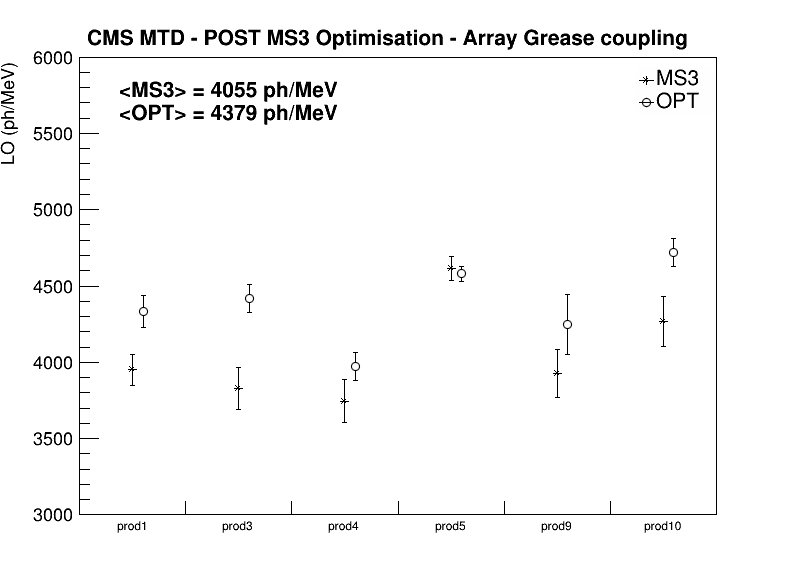

In [19]:
l.Clear()
g['LY_MS3'].Print()
g['LY_MS3'].Draw("AP*")
l.AddEntry(g['LY_MS3'],"MS3","PL")
g['LY_MS3'].GetHistogram().GetYaxis().SetLimits(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetRangeUser(3000,6000)
g['LY_MS3'].GetHistogram().GetYaxis().SetTitle("LO (ph/MeV)")
g['LY_OPT'].SetMarkerStyle(24)
g['LY_OPT'].SetMarkerSize(1.2)
l.AddEntry(g['LY_OPT'],"OPT","PL")
g['LY_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ph/MeV'%R.TMath.Mean(6,g['LY_MS3'].GetY()))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ph/MeV'%R.TMath.Mean(6,g['LY_OPT'].GetY()))
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=1.52215, ex[0]=0.03, ey[0]=0.03
x[1]=1, y[1]=1.53002, ex[1]=0.03, ey[1]=0.03
x[2]=2, y[2]=1.47036, ex[2]=0.03, ey[2]=0.03
x[3]=3, y[3]=1.65706, ex[3]=0.03, ey[3]=0.03
x[4]=4, y[4]=1.47181, ex[4]=0.03, ey[4]=0.03
x[5]=5, y[5]=1.55668, ex[5]=0.03, ey[5]=0.03


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.pdf has been created


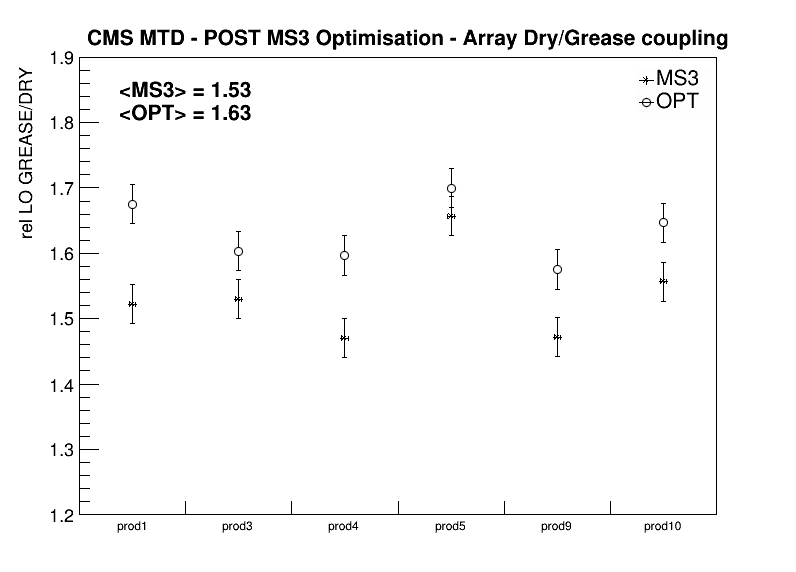

In [20]:
g['LY_DRY_GREASE_MS3'].Print()
g['LY_DRY_GREASE_MS3'].Draw("AP*")
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetLimits(1.2,1.9)
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetRangeUser(1.2,1.9)
g['LY_DRY_GREASE_MS3'].GetHistogram().GetYaxis().SetTitle("rel LO GREASE/DRY")
g['LY_DRY_GREASE_OPT'].SetMarkerStyle(24)
g['LY_DRY_GREASE_OPT'].SetMarkerSize(1.2)
g['LY_DRY_GREASE_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Dry/Grease coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.2f'%R.TMath.Mean(6,g['LY_DRY_GREASE_MS3'].GetY()))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.2f'%R.TMath.Mean(6,g['LY_DRY_GREASE_OPT'].GetY()))
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LY_DRY_GREASE_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=96.8065, ex[0]=0, ey[0]=3.88181
x[1]=1, y[1]=99.3941, ex[1]=0, ey[1]=5.24674
x[2]=2, y[2]=99.799, ex[2]=0, ey[2]=4.1517
x[3]=3, y[3]=91.1651, ex[3]=0, ey[3]=3.15793
x[4]=4, y[4]=101.733, ex[4]=0, ey[4]=9.05018
x[5]=5, y[5]=92.061, ex[5]=0, ey[5]=6.67867


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT_ARRAY_byProd.pdf has been created


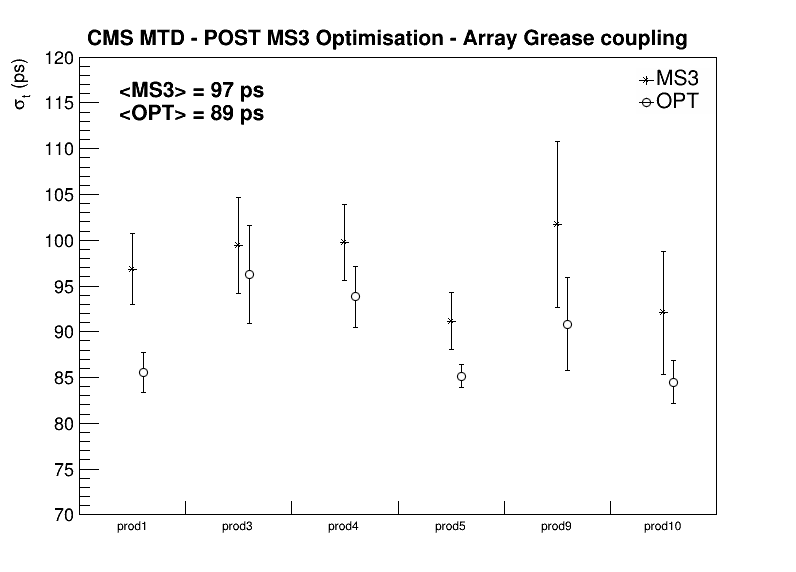

In [21]:
g['sigmaT_MS3'].Print()
g['sigmaT_MS3'].Draw("AP*")
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetLimits(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,120)
g['sigmaT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaT_OPT'].SetMarkerStyle(24)
g['sigmaT_OPT'].SetMarkerSize(1.2)
g['sigmaT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ps'%R.TMath.Mean(6,g['sigmaT_MS3'].GetY()))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ps'%R.TMath.Mean(6,g['sigmaT_OPT'].GetY()))
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=118.983, ex[0]=0, ey[0]=4.49715
x[1]=1, y[1]=124.461, ex[1]=0, ey[1]=7.28023
x[2]=2, y[2]=130.78, ex[2]=0, ey[2]=5.41889
x[3]=3, y[3]=104.711, ex[3]=0, ey[3]=3.81231
x[4]=4, y[4]=128.895, ex[4]=0, ey[4]=10.4804
x[5]=5, y[5]=109.975, ex[5]=0, ey[5]=6.55757


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.pdf has been created


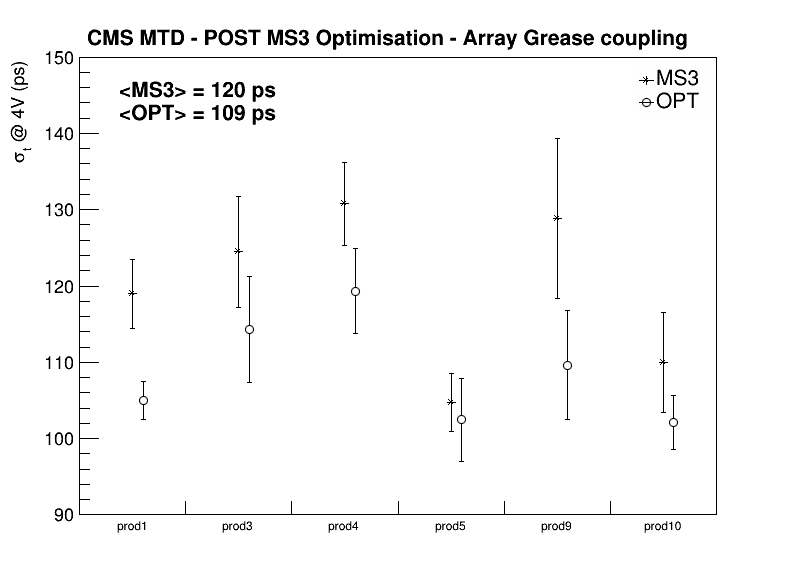

In [22]:
g['sigmaT_4V_MS3'].Print()
g['sigmaT_4V_MS3'].Draw("AP*")
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetLimits(90,150)
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetRangeUser(90,150)
g['sigmaT_4V_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} @ 4V (ps)")
g['sigmaT_4V_OPT'].SetMarkerStyle(24)
g['sigmaT_4V_OPT'].SetMarkerSize(1.2)
g['sigmaT_4V_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ps'%R.TMath.Mean(6,g['sigmaT_4V_MS3'].GetY()))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ps'%R.TMath.Mean(6,g['sigmaT_4V_OPT'].GetY()))
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT4V_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=0, ex[0]=0, ey[0]=0
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0, y[3]=0, ex[3]=0, ey[3]=0
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_LYDT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_LYDT_ARRAY_byProd.pdf has been created


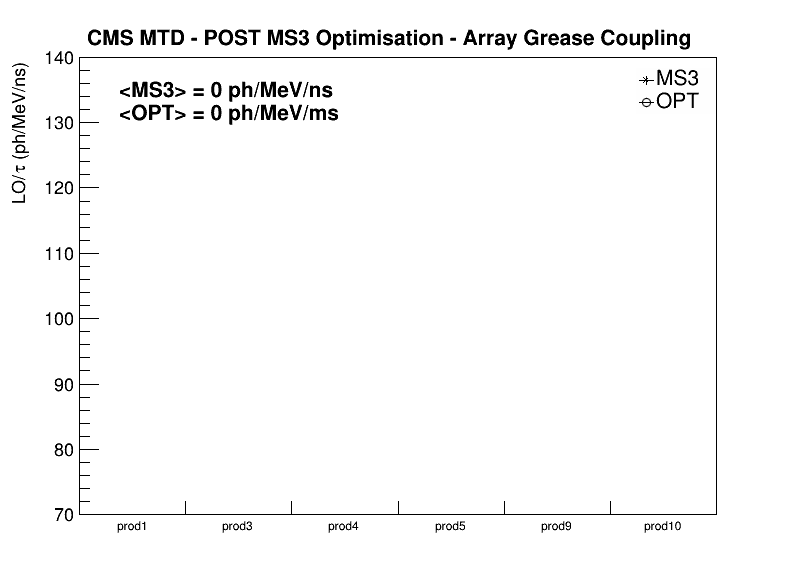

In [23]:
g['LYDT_MS3'].Print()
g['LYDT_MS3'].Draw("AP*")
g['LYDT_MS3'].GetHistogram().GetYaxis().SetLimits(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(70,140)
g['LYDT_MS3'].GetHistogram().GetYaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['LYDT_OPT'].SetMarkerStyle(24)
g['LYDT_OPT'].SetMarkerSize(1.2)
g['LYDT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease Coupling')
tL.DrawLatexNDC(0.15,0.83,'<MS3> = %.0f ph/MeV/ns'%R.TMath.Mean(6,g['LYDT_MS3'].GetY()))
tL.DrawLatexNDC(0.15,0.79,'<OPT> = %.0f ph/MeV/ms'%R.TMath.Mean(6,g['LYDT_OPT'].GetY()))
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_LYDT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=0.161331, ex[0]=0, ey[0]=0.0111908
x[1]=1, y[1]=0.186814, ex[1]=0, ey[1]=0.0165171
x[2]=2, y[2]=0.183841, ex[2]=0, ey[2]=0.0154871
x[3]=3, y[3]=0.211497, ex[3]=0, ey[3]=0.0151006
x[4]=4, y[4]=0.162088, ex[4]=0, ey[4]=0.0172198
x[5]=5, y[5]=0.150696, ex[5]=0, ey[5]=0.0156174


Info in <TCanvas::Print>: png file plots/LYSO_OPT_XT_ARRAY_byProd.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_XT_ARRAY_byProd.pdf has been created


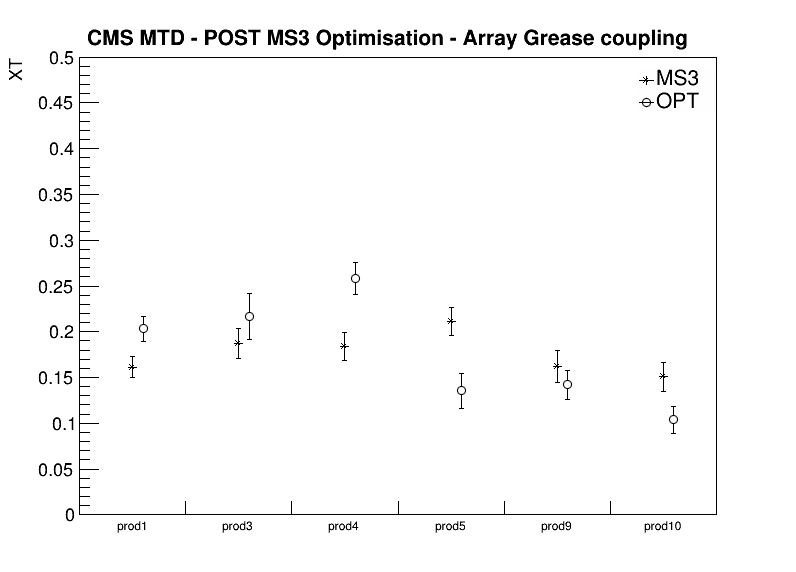

In [24]:
g['XT_MS3'].Print()
g['XT_MS3'].Draw("AP*")
g['XT_MS3'].GetHistogram().GetYaxis().SetLimits(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetRangeUser(0.000001,0.5)
g['XT_MS3'].GetHistogram().GetYaxis().SetTitle("XT")
g['XT_OPT'].SetMarkerStyle(24)
g['XT_OPT'].SetMarkerSize(1.2)
g['XT_OPT'].Draw("PSAME")
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')

c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_XT_ARRAY_byProd.%s'%ext)

x[0]=0, y[0]=0, ex[0]=0, ey[0]=0
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0, y[3]=0, ex[3]=0, ey[3]=0
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.pdf has been created


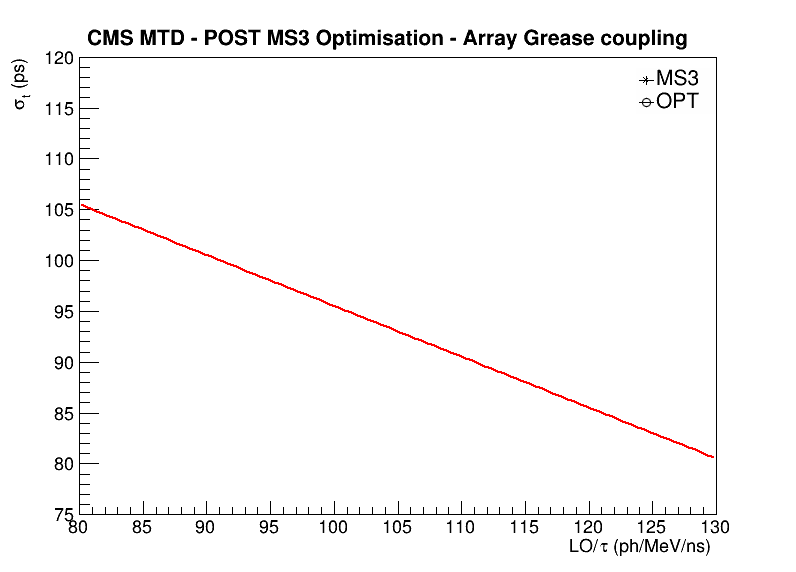

In [25]:
g['sigmaTvsLYDT_MS3'].Print()
g['sigmaTvsLYDT_MS3'].Draw("AP*")
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetLimits(75,120)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(75,120)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetLimits(80,130)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetRangeUser(80,130)
g['sigmaTvsLYDT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} (ps)")
g['sigmaTvsLYDT_MS3'].GetHistogram().GetXaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['sigmaTvsLYDT_OPT'].SetMarkerStyle(24)
g['sigmaTvsLYDT_OPT'].SetMarkerSize(1.2)
g['sigmaTvsLYDT_OPT'].Draw("PSAME")
f1=R.TF1('ff','[0]+[1]*x',0,200)
f1.SetParameter(0,145.5)
f1.SetParameter(1,-0.5)
f1.Draw('SAME')
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaTVsLYDT_ARRAY.%s'%ext)

x[0]=0, y[0]=0, ex[0]=0, ey[0]=0
x[1]=0, y[1]=0, ex[1]=0, ey[1]=0
x[2]=0, y[2]=0, ex[2]=0, ey[2]=0
x[3]=0, y[3]=0, ex[3]=0, ey[3]=0
x[4]=0, y[4]=0, ex[4]=0, ey[4]=0
x[5]=0, y[5]=0, ex[5]=0, ey[5]=0


Info in <TCanvas::Print>: png file plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.png has been created
Info in <TCanvas::Print>: pdf file plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.pdf has been created


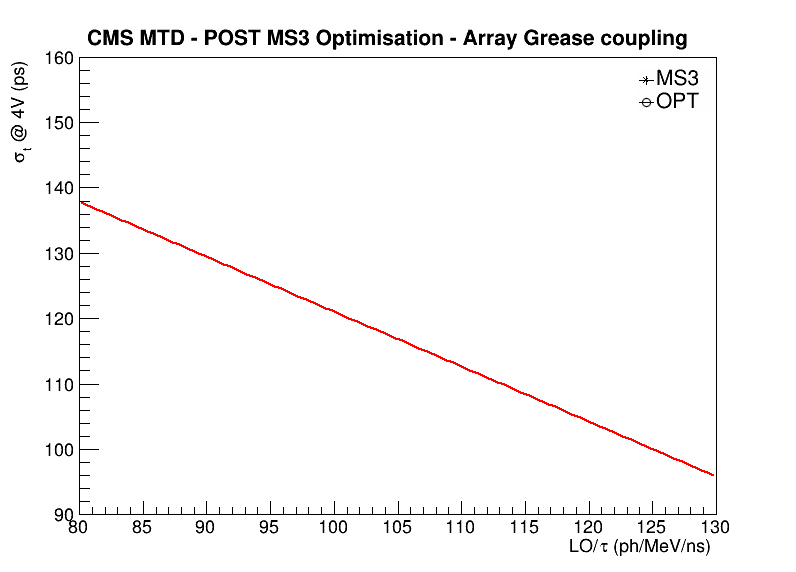

In [26]:
g['sigmaT4VvsLYDT_MS3'].Print()
g['sigmaT4VvsLYDT_MS3'].Draw("AP*")
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetLimits(90,160)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetRangeUser(90,160)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetLimits(80,130)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetRangeUser(80,130)
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetYaxis().SetTitle("#sigma_{t} @ 4V (ps)")
g['sigmaT4VvsLYDT_MS3'].GetHistogram().GetXaxis().SetTitle("LO/#tau (ph/MeV/ns)")
g['sigmaT4VvsLYDT_OPT'].SetMarkerStyle(24)
g['sigmaT4VvsLYDT_OPT'].SetMarkerSize(1.2)
g['sigmaT4VvsLYDT_OPT'].Draw("PSAME")
f2=R.TF1('ff2','[0]+[1]*x',0,200)
f2.SetParameter(0,205)
f2.SetParameter(1,-0.84)
f2.Draw('SAME')
l.Draw()
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation - Array Grease coupling')
c1.Draw()
for ext in ['png','pdf']:
    c1.SaveAs('plots/LYSO_OPT_sigmaT4VVsLYDT_ARRAY.%s'%ext)

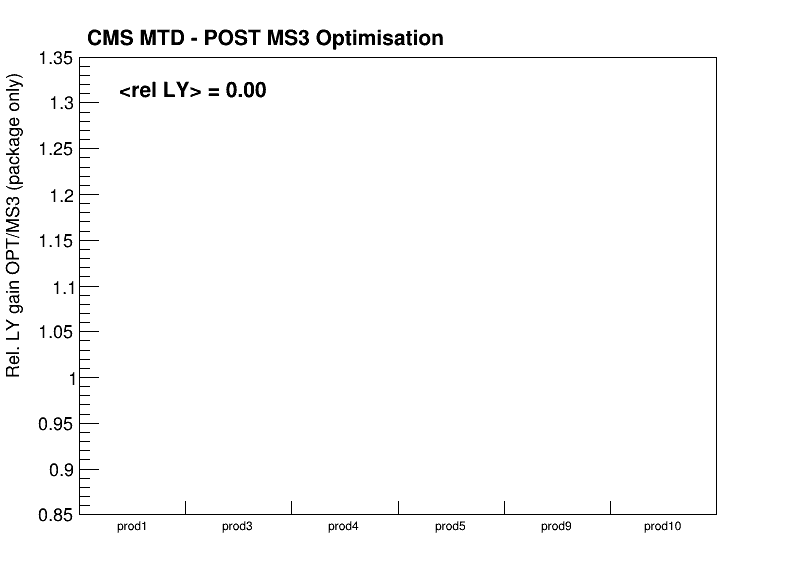

In [27]:
g['relGain_LY_OPT'].Draw("AP")
g['relGain_LY_OPT'].GetYaxis().SetTitle('Rel. LY gain OPT/MS3 (package only)')
g['relGain_LY_OPT'].GetYaxis().SetLimits(0.85,1.35)
g['relGain_LY_OPT'].GetYaxis().SetRangeUser(0.85,1.35)
g['relGain_LY_OPT'].SetMarkerStyle(24)
g['relGain_LY_OPT'].SetMarkerSize(1.2)
tL.DrawLatexNDC(0.11,0.92,'CMS MTD - POST MS3 Optimisation')
tL.DrawLatexNDC(0.15,0.83,'<rel LY> = %.2f'%R.TMath.Mean(6,g['relGain_LY_OPT'].GetY()))
c1.Draw()

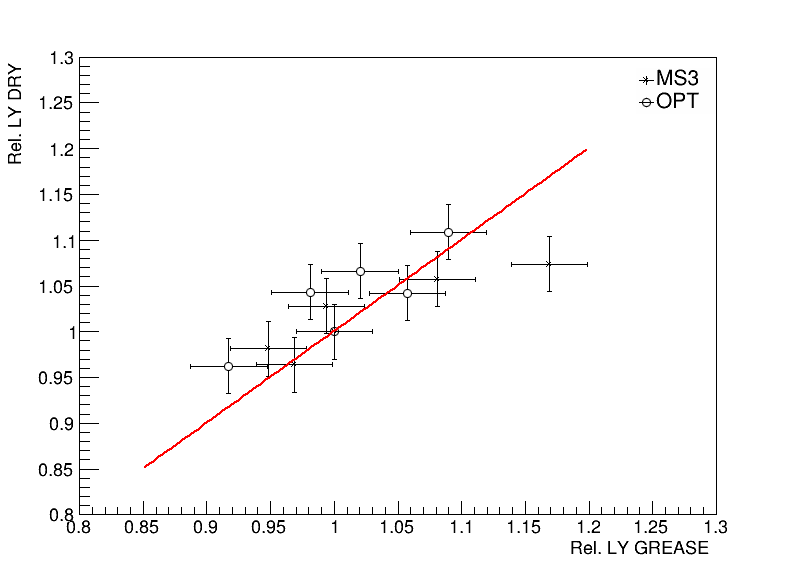

In [28]:
g['rel_MS3_DRY_GREASE'].Draw('AP*')
g['rel_MS3_DRY_GREASE'].GetYaxis().SetTitle('Rel. LY DRY')
g['rel_MS3_DRY_GREASE'].GetYaxis().SetLimits(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetYaxis().SetRangeUser(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetXaxis().SetTitle('Rel. LY GREASE')
g['rel_MS3_DRY_GREASE'].GetXaxis().SetLimits(0.8,1.3)
g['rel_MS3_DRY_GREASE'].GetXaxis().SetRangeUser(0.8,1.3)
g['rel_OPT_DRY_GREASE'].SetMarkerStyle(24)
g['rel_OPT_DRY_GREASE'].SetMarkerSize(1.2)
g['rel_OPT_DRY_GREASE'].Draw('PSAME')
f3=R.TF1('f3','x',0.85,1.2)
f3.Draw('SAME')
l.Draw()
c1.Draw()

In [21]:
fOut=R.TFile('LYSO_ARRAY_Optimisation.root','RECREATE')
for hn,h in g.items():
    h.Write(hn)
fOut.Close()